In [34]:
import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(0)

In [35]:
def PlotStuff(X, Y, model, epoch, leg = True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label = ('epoch' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [36]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
        self.a1 = None
        self.l1 = None
        self.l2 = None
        
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2 = self.linear2(self.a1)
        yhat = sigmoid(self.l2)
        
        return yhat

In [37]:
def train(X, Y, model, optimizer, criterion, epochs = 100):
    cost = []
    total = 0
    for epoch in range(epochs):
        total = 0
        for x, y in zip(X, Y):
            optimizer.zero_grad()
            
            yhat = model(X)
            loss = criterion(yhat, y)
            
            loss.backward()
            optimizer.step()
            
            total += loss.item()
        cost.append(total)
        
        if epoch % 300 == 0:
            PlotStuff(X, Y, model, epoch, leg = True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
            
    return cost
        
            

In [38]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [39]:
D_in = 1
H = 2
D_out = 1
learning_rate = 0.1
model = Net(D_in, H, D_out)

In [40]:
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

In [41]:

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0075],
                      [ 0.5364]])),
             ('linear1.bias', tensor([-0.8230, -0.7359])),
             ('linear2.weight', tensor([[-0.2723,  0.1896]])),
             ('linear2.bias', tensor([-0.0140]))])

In [46]:
model.state_dict()['linear1.weight'][0]=1.0
model.state_dict()['linear1.weight'][1]=1.0
model.state_dict()['linear1.bias'][0]=0.0
model.state_dict()['linear1.bias'][1]=0.0
model.state_dict()['linear2.weight'][0]=1.0
model.state_dict()['linear2.bias'][0]=0.0
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

In [47]:
yhat=model(torch.tensor([[-2.0],[0.0],[2.0]]))
yhat

tensor([[0.5593],
        [0.7311],
        [0.8534]], grad_fn=<SigmoidBackward0>)

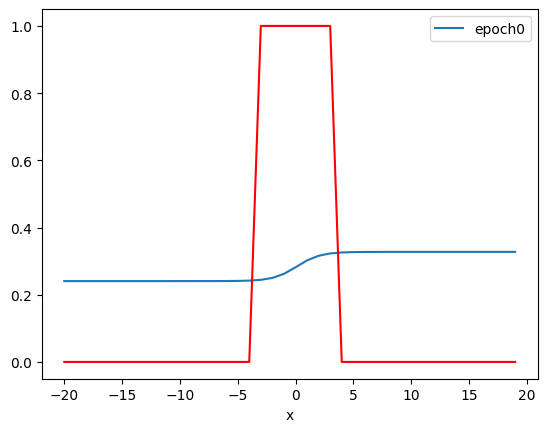

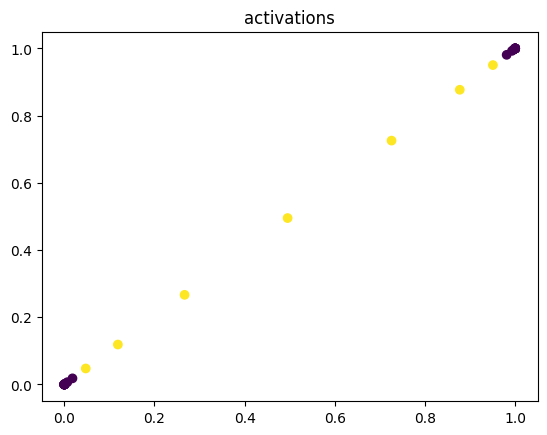

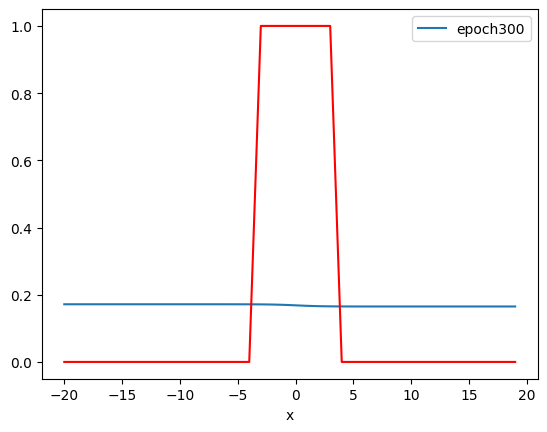

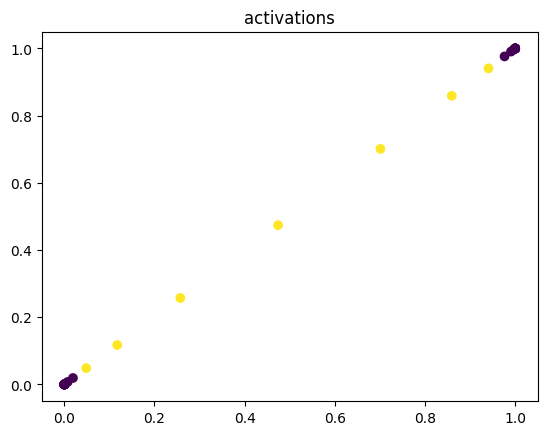

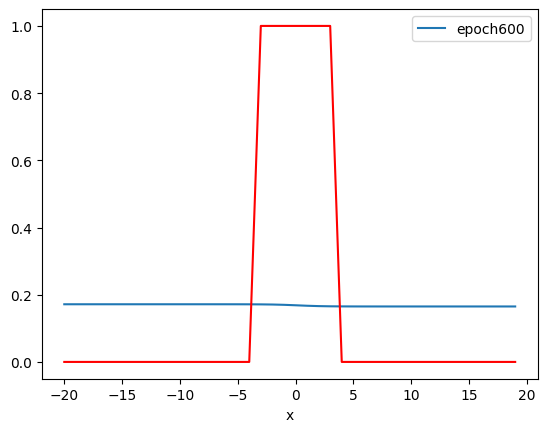

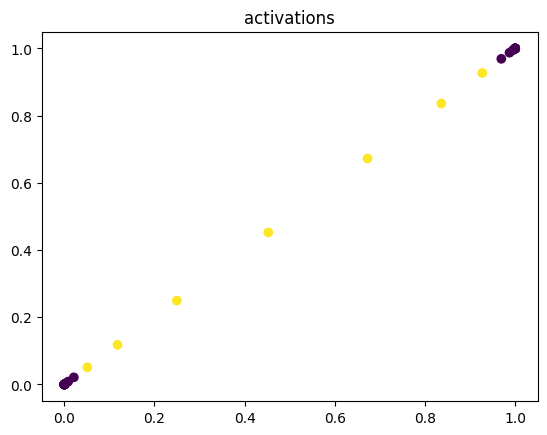

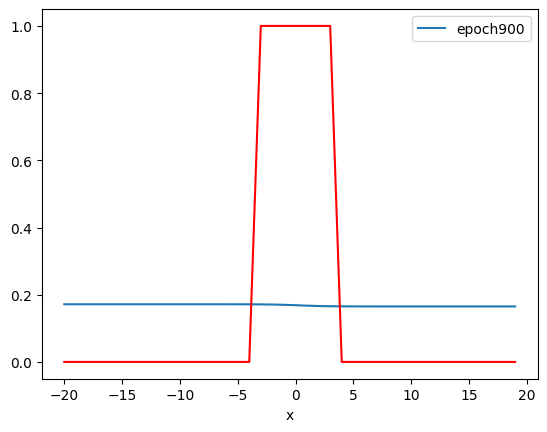

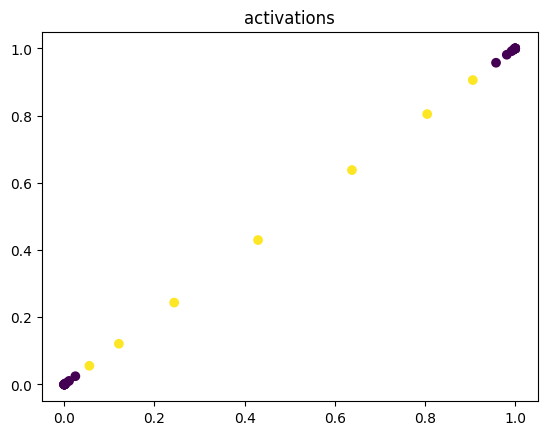

Text(0.5, 1.0, 'cross entropy loss')

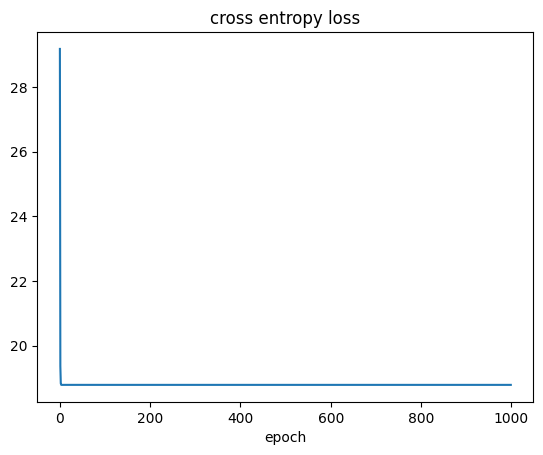

In [48]:
cost_cross = train(X, Y, model, optimizer, criterion_cross, epochs = 1000)
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')